In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [2]:
data = np.random.randint(1,1000,size = 1000)
B0 = 0.1
B1 = -23.3
eps = 0.1
y = B0 + B1*np.log(data) + eps*np.random.random()


# ***Challenge 1***

In [3]:
lr_model1 = LinearRegression()
X = pd.DataFrame(data**2)
lr_model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

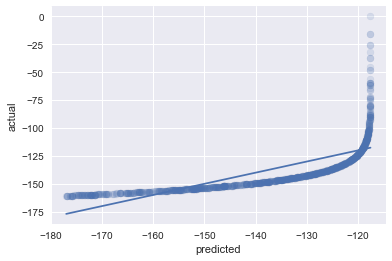

In [4]:
plt.xlabel('predicted')
plt.ylabel('actual')
pred = lr_model1.predict(X)
plt.scatter(pred, y, alpha=0.15)
vec1 = np.linspace(np.min(pred),np.max(pred),1000)
plt.plot(vec1, vec1);

In [5]:
lr_model2 = LinearRegression()
X = pd.DataFrame(np.log(data))
lr_model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

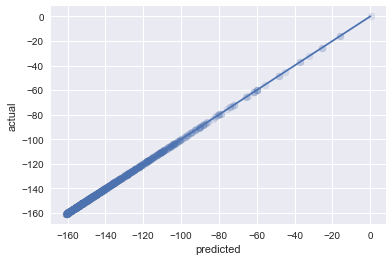

In [6]:
plt.xlabel('predicted')
plt.ylabel('actual')
pred = lr_model2.predict(X)
plt.scatter(pred, y, alpha=0.15)
vec1 = np.linspace(np.min(pred),np.max(pred),1000)
plt.plot(vec1, vec1);

# ***Challenge 2***

In [7]:
data = np.random.randint(1,1000,size = 1000)
B0 = 0.1
B1 = -23.3
B2 = 3.4
eps = 0.1
y = B0 + B1*data + B2*data**2 + eps*np.random.random()



In [8]:
X = pd.DataFrame(list(zip(-2.4*data**5, 170*data**4, np.log(data),  data**3 * data**4)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

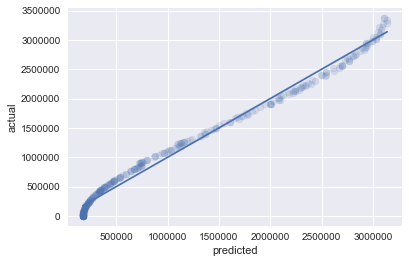

In [9]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)
plt.xlabel('predicted')
plt.ylabel('actual')
pred = lr_model3.predict(X_test)
plt.scatter(pred, y_test, alpha=0.15)
vec1 = np.linspace(np.min(pred),np.max(pred),1000)
plt.plot(vec1, vec1);

In [10]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, lr_model3.predict(X_train)), lr_model3.score(X_train, y_train))

11093179589.4 0.988072196275


In [11]:
print(mean_squared_error(y_test, lr_model3.predict(X_test)), lr_model3.score(X_test, y_test))

12226834475.7 0.987900702824


# ***Challenge 3***

In [41]:
# From what I've read on the web, this should be at least close to the AIC!
def AIC(model, X, y):
    sse = X.shape[0]*mean_squared_error(y, model.predict(X))
    return 2*X.shape[1] - 2*np.log(sse)

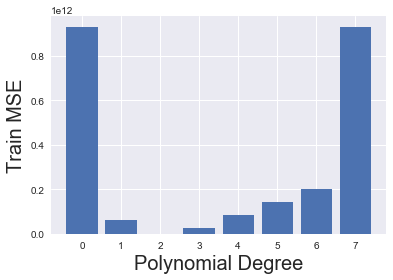

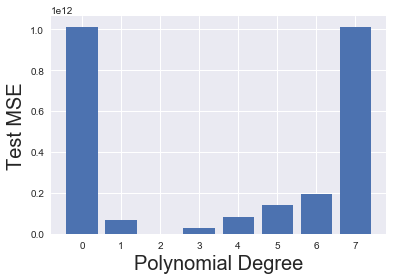

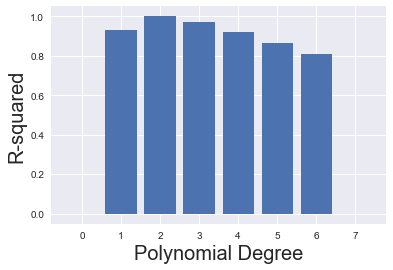

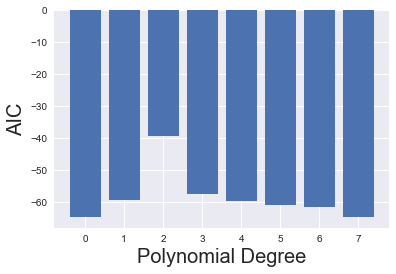

In [15]:
train_mse, test_mse, r2, aic = [], [], [], []

for i in range(8):
    X = pd.DataFrame(data**i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train,y_train)
    train_mse.append(mean_squared_error(y_train, lr_model.predict(X_train)))
    
    test_mse.append(mean_squared_error(y_test, lr_model.predict(X_test)))

    r2.append(lr_model.score(X_test, y_test))

    aic.append(AIC(lr_model, X_test, y_test))

plt.xlabel("Polynomial Degree", fontsize=20)
plt.ylabel("Train MSE", fontsize=20)
plt.bar(range(8), train_mse)
plt.show()

plt.xlabel("Polynomial Degree", fontsize=20)
plt.ylabel("Test MSE", fontsize=20)
plt.bar(range(8), test_mse)
plt.show()

plt.xlabel("Polynomial Degree", fontsize=20)
plt.ylabel("R-squared", fontsize=20)
plt.bar(range(8), r2)
plt.show()

plt.xlabel("Polynomial Degree", fontsize=20)
plt.ylabel("AIC", fontsize=20)
plt.bar(range(8), aic)
plt.show()

# ***Challenge 4***

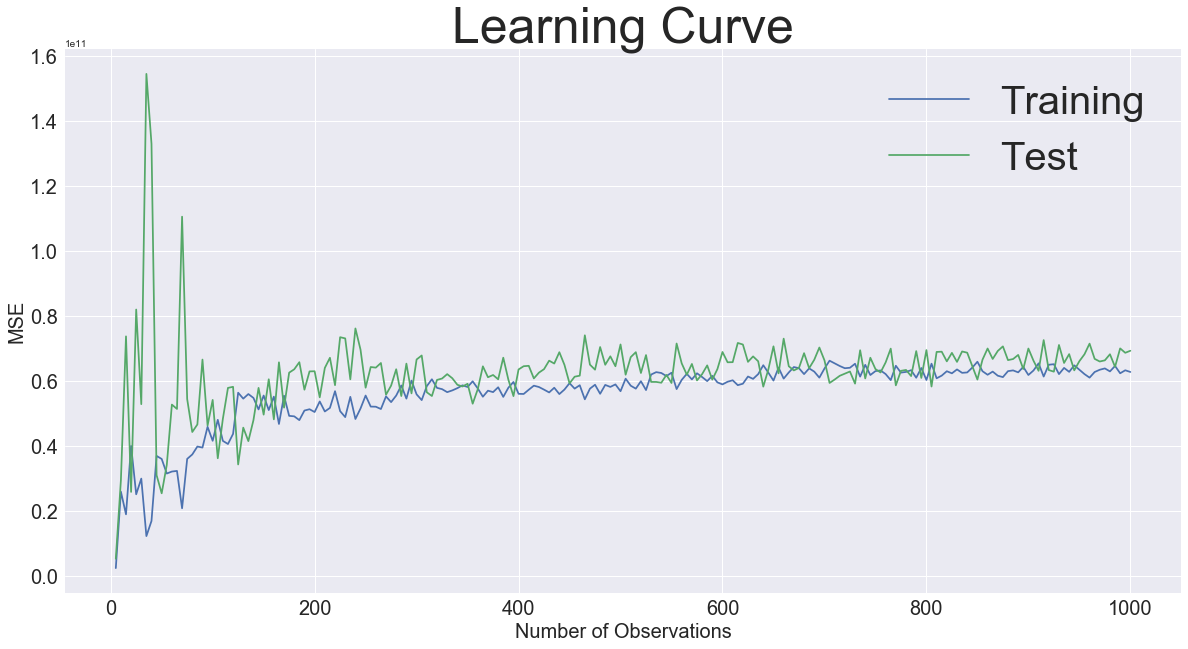

In [44]:
train_mse, test_mse = [], []
for i in range(5,1001,5):
    X = pd.DataFrame(data[:i])
    X_train, X_test, y_train, y_test = train_test_split(X, y[:i], test_size=0.3,random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train,y_train)
    train_mse.append(mean_squared_error(y_train, lr_model.predict(X_train)))
    
    test_mse.append(mean_squared_error(y_test, lr_model.predict(X_test)))

plt.figure(figsize=(20,10))
plt.xlabel("Number of Observations", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Learning Curve", fontsize=50)
train, = plt.plot(range(5,1001,5), train_mse, label='Training')
test, = plt.plot(range(5,1001,5), test_mse, label='Test')

plt.legend(handles=[train, test], fontsize=40);